In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


Pregnancies — количество беременностей.

Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

BloodPressure — диастолическое артериальное давление (мм рт. ст.).

SkinThickness — толщина кожной складки трицепса (мм).

Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

BMI — индекс массы тела (вес в кг/(рост в м)^2).

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

Age — возраст.

Outcome — наличие диабета (0 — нет, 1 — да).

Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [7]:
mask = diabetes.duplicated() 
duplicates = diabetes[mask]
print(f'число найденных дубликатов: {duplicates.shape[0]}')
diabetes = diabetes.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {dedupped.shape[0]}')

число найденных дубликатов: 10
Результирующее число записей: 768


Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [8]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [9]:
diabetes = diabetes.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {diabetes.shape[1]}')

Результирующее число признаков: 9


In [12]:
display(diabetes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


None

Попробуйте найти пропуски в данных с помощью метода isnull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [13]:
cols_null_percent = diabetes.isnull().mean() * 100 
# вывести на экран названия столбцов, где число пропусков больше 0.
# Для этого вычислим средний по столбцам результат метода isnull().
# Получим долю пропусков в каждом столбце.
# True — 1, False — 0, при расчёте среднего получим долю 1 от общего числа строк.
# Умножаем на 100 %, находим столбцы, где доля пропусков больше 0
cols_with_null = cols_null_percent[
    cols_null_percent > 0].sort_values(ascending=False)
# сортируем по убыванию
display(cols_with_null)

Series([], dtype: float64)

In [14]:
# замена значений 0 на NaN в упомянутых столбцах
diabetes['Glucose'] = diabetes['Glucose'].replace(0, np.nan)
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0, np.nan)
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(0, np.nan)
diabetes['Insulin'] = diabetes['Insulin'].replace(0, np.nan)
diabetes['BMI'] = diabetes['BMI'].replace(0, np.nan)

In [22]:
cols_null_percent = diabetes.isnull().mean() * 100 
# вывести на экран названия столбцов, где число пропусков больше 0.
# Для этого вычислим средний по столбцам результат метода isnull().
# Получим долю пропусков в каждом столбце.
# True — 1, False — 0, при расчёте среднего получим долю 1 от общего числа строк.
# Умножаем на 100 %, находим столбцы, где доля пропусков больше 0
cols_with_null = cols_null_percent[
    cols_null_percent > 0].sort_values(ascending=False)
# сортируем по убыванию
display(round(cols_with_null/100, 2))

Insulin          0.49
SkinThickness    0.30
BloodPressure    0.05
BMI              0.01
Glucose          0.01
dtype: float64

2й спосою
def nan_function(x):
    return np.nan if x == 0 else x
diabetes["Glucose"] = diabetes["Glucose"].apply(nan_function)
diabetes["BloodPressure"] = diabetes["BloodPressure"].apply(nan_function)
diabetes["SkinThickness"] = diabetes["SkinThickness"].apply(nan_function)
diabetes["Insulin"] = diabetes["Insulin"].apply(nan_function)
diabetes["BMI"] = diabetes["BMI"].apply(nan_function)
diabetes.isnull().mean().round(2).sort_values(ascending=False)

Задание 8.4

Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [26]:
# создаем минимальный парог: вычисляем 70% от числа строк
thresh = diabetes.shape[0]*0.7
# удаляем столбцы, в которых более 30% (100-70) пропусков
diabetes = diabetes.dropna(thresh=thresh, axis=1) 
# отображаем результирующую долю пропусков
display(diabetes.shape[1])


8

Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [28]:
m = diabetes.shape[1]
diabetes = diabetes.dropna(thresh=m-2, axis=0)
print(diabetes.shape[0])

761


В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [29]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               761 non-null    int64  
 1   Glucose                   756 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  761 non-null    float64
 6   Age                       761 non-null    int64  
 7   Outcome                   761 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 53.5 KB


In [31]:
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'Pregnancies': diabetes['Pregnancies'].median(),
    'Glucose': diabetes['Glucose'].median(),
    'BloodPressure': diabetes['BloodPressure'].median(),
    'SkinThickness': diabetes['SkinThickness'].median(),
    'BMI': diabetes['BMI'].median(),
    'DiabetesPedigreeFunction': diabetes['DiabetesPedigreeFunction'].median(),
    'Age': diabetes['Age'].median(),
    'Outcome': diabetes['Outcome'].median()
    }
#заполняем пропуски в соответствии с заявленным словарем
diabetes = diabetes.fillna(values)


In [33]:
round(diabetes['SkinThickness'].mean(), 1)

29.1

Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [58]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [41]:
outliers, cleaned = outliers_iqr(diabetes,'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

In [37]:
def outliers_z_score(data, feature, log_scale=False): #DataFrame, признак,
    # возможность работы в логарифмическом масштабе. Если он равен True, то
    # будем логарифмировать рассматриваемый признак, иначе — оставляем его в
    # исходном виде.
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean() # среднее значение
    sigma = x.std() # стандартное откланение
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [38]:
outliers, cleaned = outliers_z_score(diabetes, 'SkinThickness')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

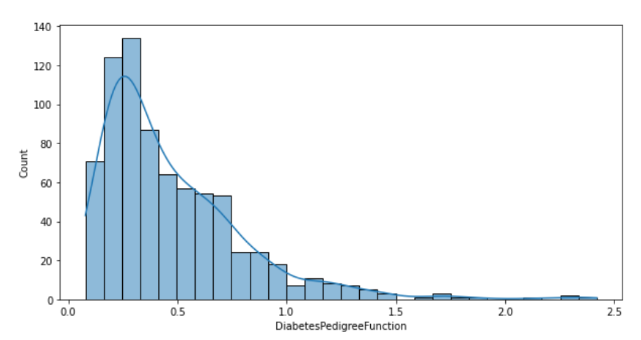

Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

In [55]:
outliers, cleaned = outliers_iqr_mod(diabetes,'DiabetesPedigreeFunction', log_scale=False)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
a = outliers.shape[0]

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732


In [56]:
outliers, cleaned = outliers_iqr_mod(diabetes,'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
b = outliers.shape[0]

Число выбросов по методу Тьюки: 0
Результирующее число записей: 761


In [57]:
a - b

29

In [54]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction')
outliers_log, _ = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
print(outliers.shape[0] - outliers_log.shape[0])

29
